In [1]:
# download data
!curl -O https://raw.githubusercontent.com/fbeilstein/machine_learning/master/datasets/zno_2016.7z
!curl -O https://raw.githubusercontent.com/fbeilstein/machine_learning/master/datasets/zno_2017.7z
!curl -O https://raw.githubusercontent.com/fbeilstein/machine_learning/master/datasets/zno_2018.7z
!curl -O https://raw.githubusercontent.com/fbeilstein/machine_learning/master/datasets/zno_2019.7z

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 21.4M  100 21.4M    0     0  3850k      0  0:00:05  0:00:05 --:--:-- 4717k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 23.3M  100 23.3M    0     0  5772k      0  0:00:04  0:00:04 --:--:-- 5773k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 25.0M  100 25.0M    0     0  3467k      0  0:00:07  0:00:07 --:--:-- 4805k02k      0  0:00:09  0:00:04  0:00:05 2801k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 27.4M  100 27.4M    0     0  7226k      0  0:00:03  0:00:03 --:--:-- 7225k


In [3]:
# unpack data
!7z e zno_2016.7z
!7z e zno_2017.7z
!7z e zno_2018.7z
!7z e zno_2019.7z


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=utf8,Utf16=on,HugeFiles=on,64 bits,8 CPUs x64)

Scanning the drive for archives:
  0M Sca        1 file, 22534640 bytes (22 MiB)

Extracting archive: zno_2016.7z
--
Path = zno_2016.7z
Type = 7z
Physical Size = 22534640
Headers Size = 130
Method = LZMA2:24
Solid = -
Blocks = 1

      7% - zno_2016.cs                   16% - zno_2016.cs                   24% - zno_2016.cs                   33% - zno_2016.cs                   41% - zno_2016.cs                   49% - zno_2016.cs                   58% - zno_2016.cs                   66% - zno_2016.cs                   74% - zno_2016.cs                   83% - zno_2016.cs                   92% - zno_2016.cs                  Everything is Ok

Size:       711144477
Compressed: 22534640

7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=utf8,Utf16=on,HugeFiles=on,64 bits,8 CPUs x64)

Scanning the drive 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

In [2]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10

In [3]:
# load data
zno_2016 = pd.read_csv("zno_2016.csv")
zno_2017 = pd.read_csv("zno_2017.csv")
zno_2018 = pd.read_csv("zno_2018.csv")
zno_2019 = pd.read_csv("zno_2019.csv")

/anaconda3/envs/storylook/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (119) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/anaconda3/envs/storylook/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (100,116,117,120,122,123,124,125) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Number of applicants

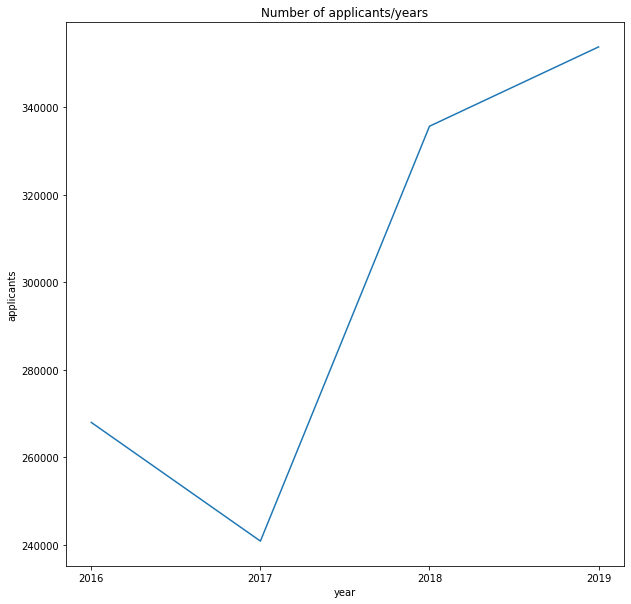

In [4]:
plt.plot(["2016", "2017", "2018" ,"2019"], [len(zno_2016), len(zno_2017), len(zno_2018), len(zno_2019)])
plt.title("Number of applicants/years")
plt.xlabel("year")
plt.ylabel("applicants");

## Age of applicants

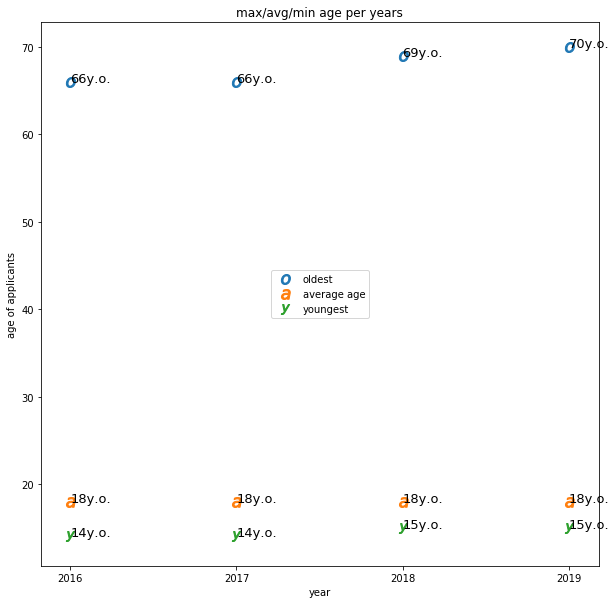

In [232]:
# Selective average
mean_2016 = int(2016 - np.mean(zno_2016.Birth))
mean_2017 = int(2017 - np.mean(zno_2017.BIRTH))
mean_2018 = int(2018 - np.mean(zno_2018.Birth))
mean_2019 = int(2019 - np.mean(zno_2019.Birth))

# oldest applicant
oldest_2016 = 2016 - np.min(zno_2016.Birth)
oldest_2017 = 2017 - np.min(zno_2017.BIRTH)
oldest_2018 = 2018 - np.min(zno_2018.Birth)
oldest_2019 = 2019 - np.min(zno_2019.Birth)

# youngest applicant
youngest_2016 = 2016 - np.max(zno_2016.Birth)
youngest_2017 = 2017 - np.max(zno_2017.BIRTH)
youngest_2018 = 2018 - np.max(zno_2018.Birth)
youngest_2019 = 2019 - np.max(zno_2019.Birth)

fig, ax = plt.subplots()
y1 = [oldest_2016, oldest_2017, oldest_2018, oldest_2019]
x = ["2016","2017","2018","2019"]
mrkr_size = 100
text_size = 13

ax.scatter(x = x,
           y = y1,
           s=mrkr_size,
           label="oldest",
           marker="$o$")
for i, o in enumerate(y1):
    ax.annotate(f"{o}y.o.", (x[i], y1[i]), size=text_size)
    
    
y2 = [mean_2016, mean_2017, mean_2018, mean_2019]   
ax.scatter(x = x,
           y = y2,
           s=mrkr_size,
           label="average age",
           marker="$a$")
for i, a in enumerate(y2):
    ax.annotate(f"{a}y.o.", (x[i], y2[i]), size=text_size)
    
y3 = [youngest_2016, youngest_2017, youngest_2018, youngest_2019] 
plt.scatter(x = x,
            y = y3,
            s=mrkr_size,
            label="youngest",
            marker="$y$")
for i, yn in enumerate(y3):
    ax.annotate(f"{yn}y.o.", (x[i], y3[i]), size=text_size)

plt.title("max/avg/min age per years")
plt.legend(loc=10)
plt.xlabel("year")
plt.ylabel("age of applicants");

## Gender distribution

In [47]:
gender_df = pd.DataFrame()
gender_df["2016"] = zno_2016.SexTypeName
gender_df["2017"] = zno_2017.SEXTYPENAME
gender_df["2018"] = zno_2018.SEXTYPENAME
gender_df["2019"] = zno_2019.SEXTYPENAME

def gender_d(year):
    sns.countplot(gender_df[year].values, palette="Set3")
    plt.title("Gender distribution")
    plt.ylabel("Gender ")
    plt.xlabel("Count")

interact(gender_d, 
         year=["2016", "2017","2018","2019"]);

interactive(children=(Dropdown(description='year', options=('2016', '2017', '2018', '2019'), value='2016'), Ou…

## Distribution per region

In [48]:
Regname_df = pd.DataFrame()
Regname_df["2016"] = zno_2016.Regname
Regname_df["2017"] = zno_2017.REGNAME
Regname_df["2018"] = zno_2018.REGNAME
Regname_df["2019"] = zno_2019.REGNAME

def Regname_d(year):
    sns.countplot(Regname_df[year].values, palette="tab20b")
    plt.title("Distribution per region")
    plt.xlabel("Region")
    plt.ylabel("count")
    plt.xticks(rotation='vertical')

interact(Regname_d, 
         year=["2016", "2017","2018","2019"]);

interactive(children=(Dropdown(description='year', options=('2016', '2017', '2018', '2019'), value='2016'), Ou…

## Subjects per year

In [8]:
ZNO_dict ={
    "2016":{
        "украинский":zno_2016.UkrBall100.values,
        "математика":zno_2016.MathBall100.values,
        "история":zno_2016.HistBall100.values
    },
    "2017":{
        "украинский":zno_2017.UKRBALL100.values,
        "математика":zno_2017.MATHBALL100.values,
        "история":zno_2017.HISTBALL100.values
    },
    "2018":{
        "украинский":zno_2018.UkrBall100.values,
        "математика":zno_2018.mathBall100.values,
        "история":zno_2018.histBall100.values
    },
    "2019":{
        "украинский":zno_2019.UkrBall100.values,
        "математика":zno_2019.mathBall100.values,
        "история":zno_2019.histBall100.values
    }
}

In [12]:
def y_sub(year, subject, min_mark, bins):
    x=ZNO_dict[year][subject]
    # drop NaNs
    x = x[~np.isnan(x)]
    # drop zeros
    x = x[x!=0]
    plt.hist(x[x > min_mark], bins=bins)
    plt.title(f"{len(x[x > min_mark])} apllicants have mark mor then {min_mark}")
    plt.xlabel(f"number of points ({subject})")
    plt.ylabel("count")

interact(y_sub,
         bins=widgets.IntSlider(min=5, max=200, step=5, value=30),
         min_mark=widgets.IntSlider(min=100, max=195, step=5, value=100),
         year=["2016", "2017","2018","2019"],
         subject=["украинский", "математика", "история"]);

interactive(children=(Dropdown(description='year', options=('2016', '2017', '2018', '2019'), value='2016'), Dr…

## Most popular schools

In [43]:
Schools_df = pd.DataFrame()
Schools_df["2016"] = zno_2016.EOName
Schools_df["2017"] = zno_2017.EONAME
Schools_df["2018"] = zno_2018.EONAME
Schools_df["2019"] = zno_2019.EONAME

In [44]:
def Popular_schools(year, top):
    unique,pos = np.unique(Schools_df[year].dropna(), return_inverse=True)
    counts = np.bincount(pos)
    maxsort = counts.argsort()[::-1]
    u_top = unique[maxsort][:top]
    c_top = (counts[maxsort][:top])
    print("Заклади з найбільшою кількістю абітурієрнтів:")
    for num, u in enumerate(u_top):
        print(f"{u} - {c_top[num]} абітурієнтів")

interact(Popular_schools, 
         year=["2016", "2017","2018","2019"],
         top = widgets.IntSlider(min=1, max=10, step=1, value=5));

interactive(children=(Dropdown(description='year', options=('2016', '2017', '2018', '2019'), value='2016'), In…